In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# Load datasets
zoo_df = pd.read_csv("zoo.csv")
class_df = pd.read_csv("class.csv")

# Drop 'animal_name' as it's not needed for ML
zoo_df.drop(columns=["animal_name"], inplace=True)

# Check for missing values
print("Missing Values:\n", zoo_df.isnull().sum())

# Encode target variable (class_type)
label_encoder = LabelEncoder()
zoo_df["class_type"] = label_encoder.fit_transform(zoo_df["class_type"])

# Define features (X) and target (y)
X = zoo_df.drop(columns=["class_type"])
y = zoo_df["class_type"]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Missing Values:
 hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64


Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



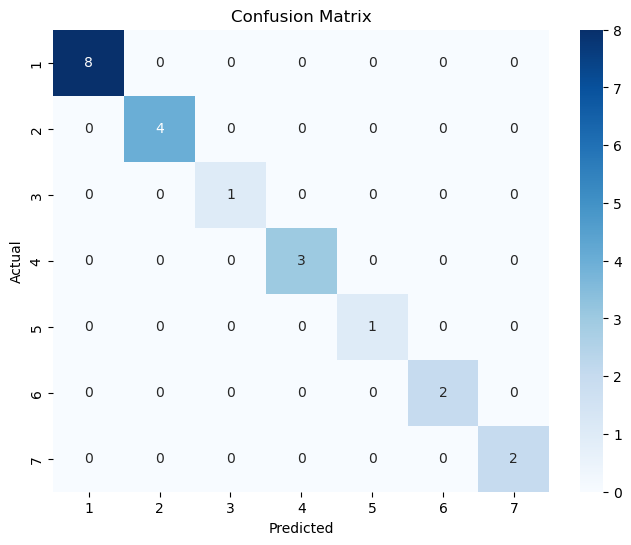

In [12]:
# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, None],
    'min_samples_split': [5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate performance
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Model Accuracy: 1.0


In [11]:
# Create DataFrame to document results
results_df = pd.DataFrame(grid_search.cv_results_)

# Save as CSV for documentation
results_df.to_csv("model_optimization_results.csv", index=False)

print("Optimization results saved to 'model_optimization_results.csv'")

Optimization results saved to 'model_optimization_results.csv'


📊 Final Optimized Model Accuracy: 1.00

🔹 Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



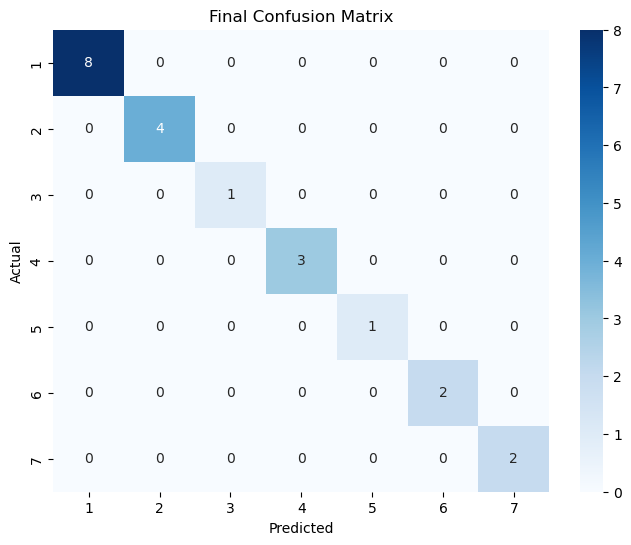

In [13]:
# Re-evaluate the optimized model
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"📊 Final Optimized Model Accuracy: {final_accuracy:.2f}")

# Display Classification Report
print("\n🔹 Final Classification Report:\n", classification_report(y_test, y_pred_best))

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap="Blues", fmt="d", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Final Confusion Matrix")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (assuming all except class_type are numeric)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [26]:
# Connect to SQLite database
conn = sqlite3.connect("zoo_database.db")

# Load CSV data into a Pandas DataFrame
zoo_df = pd.read_csv("zoo.csv")

# Save it into SQLite
zoo_df.to_sql("zoo_data", conn, if_exists="replace", index=False)

conn.close()

print("✅ Table 'zoo_data' has been created successfully in SQLite!")


✅ Table 'zoo_data' has been created successfully in SQLite!


In [28]:
conn = sqlite3.connect("zoo_database.db")
query = "SELECT * FROM zoo_data"
zoo_df = pd.read_sql(query, conn)
conn.close()

print("✅ Data successfully retrieved from SQL!")


✅ Data successfully retrieved from SQL!


In [30]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("zoo_database.db")

# Read the dataset into a Pandas DataFrame
query = "SELECT * FROM zoo_data"
zoo_df = pd.read_sql(query, conn)

conn.close()
